## 自动识别图片中文字区域并生成50 x 50大小图片

In [9]:
import cv2

In [10]:
# file_name = input("Please input file name:")
file_name = "num.jpg"

In [11]:
image = cv2.imread(file_name)

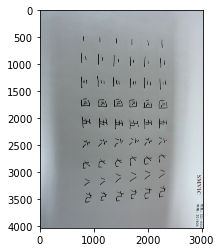

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(image)
plt.show()

In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
srcWidth, srcHeight, channels = image.shape
print(srcWidth, srcHeight)

4032 3024


In [14]:
binary = cv2.medianBlur(gray,7)
ret, binary = cv2.threshold(binary, 90, 255, cv2.THRESH_BINARY)
cv2.imwrite("2-Binary.png", binary, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
binary = cv2.Canny(binary, 0, 60, apertureSize = 3)
cv2.imwrite("3-canny.png", binary, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

True

len:78
draw len:36


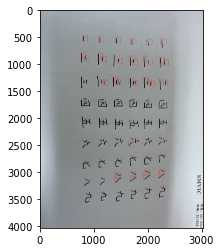

In [8]:
import numpy as np

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12,10))
dilate = cv2.dilate(opening, dilate_kernel, iterations=3)

contours, hierarchy = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"len:{len(contours)}")
image_cpy = image.copy()
# mask = np.zeros(binary.shape[:2],dtype=np.uint8)
count = 0
for i in range(len(contours)):
    contour = contours[i]
    area = cv2.contourArea(contour)
    if area > 2000 and area < 11000:
        count += 1
        x,y,w,h = cv2.boundingRect(contour)
        image_cpy = cv2.rectangle(image_cpy,(x,y),(x+100,y+100),(255,0,0), 2)
        cv2.imwrite(f"test_out/{count}.png", cv2.resize(image[int(y):int(y+100),int(x):int(x+100)],None,fx=0.5,fy=0.5), [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

print(f"draw len:{count}")
# cv2.imwrite("4-1-opening.png", opening, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
# cv2.imwrite("4-2-dilate.png", dilate, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
# cv2.imwrite("5-rectangle.png", image_cpy, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
plt.imshow(image_cpy)
plt.show()